In [1]:
import sys

import matplotlib.pyplot as plt
import json

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

try:
    from degas import *
except:
    pass


%load_ext autoreload
%autoreload 2

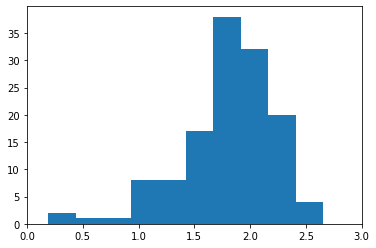

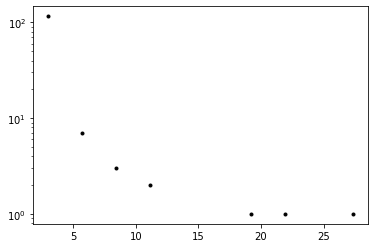

In [25]:
data_path = dysts.data_path

with open(data_path, "r") as file:
    data = json.load(file)
print(f"Total models being analyzed is {len(data.keys())}.")


all_lyapunov = list()
all_correlation_dimensions = list()
all_kaplan_yorke_dimensions = list()
all_dynamical_dimensions = list()
for item in data:
    all_lyapunov.append(data[item]["maximum_lyapunov_estimated"] * data[item]["period"])
    all_correlation_dimensions.append(data[item]["correlation_dimension"])
    all_kaplan_yorke_dimensions.append(data[item]["kaplan_yorke_dimension"])
    all_dynamical_dimensions.append(len(data[item]["initial_conditions"]))

plt.figure()
plt.hist(all_correlation_dimensions)
plt.xlim([0, 3])

plt.figure()
histvals, bins = np.histogram(all_lyapunov)
plt.semilogy(3 + bins[:-1], histvals, '.k')

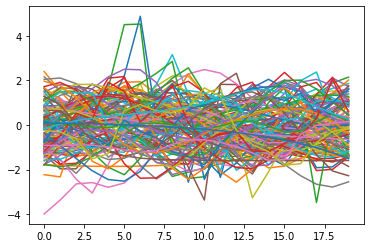

In [4]:
INPUT_PATH = "dysts/data/dataset.json"
with open(INPUT_PATH, "r") as file:
    data = json.load(file)
    
all_series = np.vstack([data[item]["values"] for item in data])

all_series -= np.mean(all_series, axis=1, keepdims=True)
all_series /= np.std(all_series, axis=1, keepdims=True)


plt.plot(all_series.T[:20]);

In [5]:
import pandas as pd
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

all_df = list()
for i in range(len(all_series)):
    series_arr = all_series[i]
    series_pd = pd.DataFrame(np.vstack([i * np.ones(len(series_arr)), np.arange(len(series_arr)), series_arr]).T, columns=["id", "time", "value"])
    all_df.append(series_pd)
    
#     if i > 10:
#         break
    
all_datasets = pd.concat(
    all_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)    

# extracted_features = extract_features(series_pd, column_id="id", column_sort="time")

In [6]:
extracted_features = extract_features(all_datasets, column_id="id", column_sort="time")
feat_arr = extracted_features.to_numpy()

filter_nans = ~np.isnan(np.mean(feat_arr, axis=0))

feat_names = np.array(list(extracted_features.columns))[filter_nans]
feat_arr = feat_arr[:, filter_nans]
feat_arr = (feat_arr - np.mean(feat_arr, axis=0))

filter_nonvarying = (np.std(feat_arr, axis=0) > 0)

feat_names = feat_names[filter_nonvarying]
feat_arr = feat_arr[:, filter_nonvarying]

Feature Extraction: 100%|██████████| 33/33 [00:04<00:00,  7.97it/s]


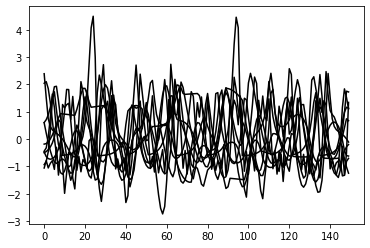

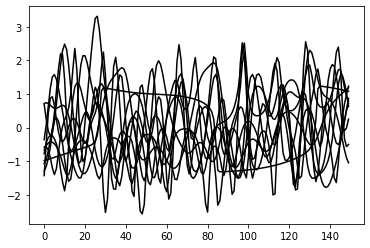

In [23]:
group1_bool = (embedding[:, 0] > 8)

plt.figure()
plt.plot(all_series[group1_bool][:10, :200].T, 'k');

plt.figure()
plt.plot(all_series[~group1_bool][:10, :200].T, 'k');

In [30]:
names[8]

'Blasius'

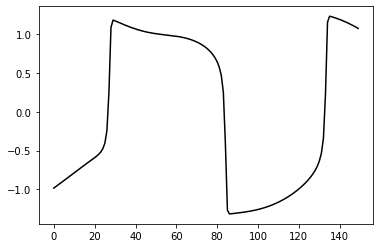

In [29]:
plt.plot(all_series[~group1_bool][8, :200].T, 'k');

<ipython-input-146-a55336a2a0fc>:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(minmag))


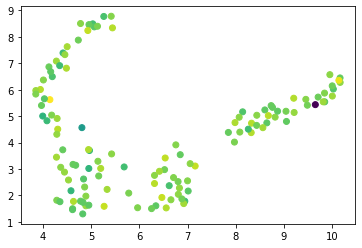

In [146]:

plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(minmag))

<ipython-input-15-f22f9d511368>:8: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(lyaps))


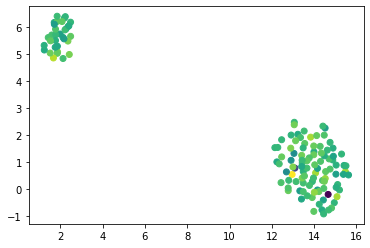

In [15]:
# names = np.array(list(data.keys()))
# lyaps = np.array([getattr(dysts.flows, item)().maximum_lyapunov_estimated for item in data])
# kydims = [getattr(dysts.flows, item)().kaplan_yorke_dimension for item in data]
# cdims = [getattr(dysts.flows, item)().correlation_dimension for item in data]
# minmag = [np.min(np.abs(getattr(dysts.flows, item)().lyapunov_spectrum_estimated)) for item in data]
# dtvals = np.array([getattr(dysts.flows, item)().dt for item in data])
# periods = np.array([getattr(dysts.flows, item)().period for item in data])
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(lyaps))

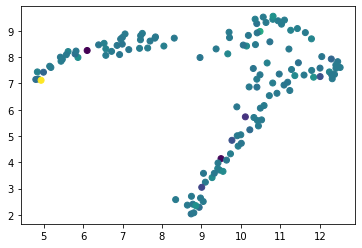

In [187]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=feat_arr[:, 7])

In [207]:
feat_names[4]

'value__mean_change'

In [17]:
from scipy.stats import spearmanr


for i, feats in enumerate(feat_arr.T):
    max_corr = max(
        np.abs(spearmanr(embedding[:, 0], feats).correlation),
        np.abs(spearmanr(embedding[:, 1], feats).correlation)
       )
    if max_corr > 0.5:
        print(i, feat_names[i], max_corr)
        

4 value__mean_change 0.5692040783643837
178 value__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0 0.5692040783643837
281 value__fft_coefficient__attr_"real"__coeff_59 0.5453691346821119
287 value__fft_coefficient__attr_"real"__coeff_65 0.5151817648000854
290 value__fft_coefficient__attr_"real"__coeff_68 0.5435061122084023
291 value__fft_coefficient__attr_"real"__coeff_69 0.5073239737361874
294 value__fft_coefficient__attr_"real"__coeff_72 0.5633107350664602
297 value__fft_coefficient__attr_"real"__coeff_75 0.5093418032349329
484 value__fft_coefficient__attr_"angle"__coeff_36 0.5106229648214381
486 value__fft_coefficient__attr_"angle"__coeff_38 0.5283190092350398
491 value__fft_coefficient__attr_"angle"__coeff_43 0.5025623231730102
493 value__fft_coefficient__attr_"angle"__coeff_45 0.5449367426466664
494 value__fft_coefficient__attr_"angle"__coeff_46 0.5044253456467197
495 value__fft_coefficient__attr_"angle"__coeff_47 0.5824213953984947
496 value__fft_coefficient__attr_"an

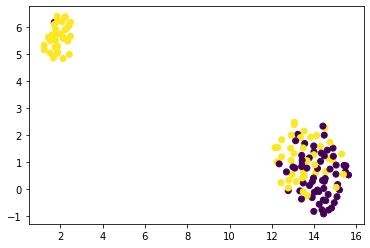

In [22]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=feat_arr[:, 523])

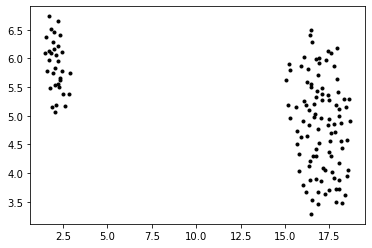

In [102]:

model = umap.UMAP()
embedding = model.fit_transform(feat_arr)

plt.plot(embedding[:, 0], embedding[:, 1], '.k')

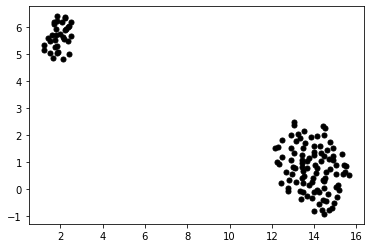

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap


# model =  PCA(n_components=2)
# model =  TSNE(n_components=2, perplexity=10)
model = umap.UMAP()
embedding = model.fit_transform(feat_arr)

plt.plot(embedding[:, 0], embedding[:, 1], '.k', markersize=10)

In [46]:
series_pd

,id,time,value
0,11.0,0.0,0.607279
1,11.0,1.0,0.710913
2,11.0,2.0,0.884983
3,11.0,3.0,1.156696
4,11.0,4.0,1.535859
...,...,...,...
145,11.0,145.0,-1.124033
146,11.0,146.0,-0.724464
147,11.0,147.0,-0.440211
148,11.0,148.0,-0.278864
